In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading in the data in a DataFrame

titanic_data = pd.read_csv("C:/Users/hp/Desktop/DAND P2/P2/titanic-data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some of the key variables here to compare with the 'Survived' column, would be 'Sex', 'Age', 'Pclass' and 'Embarked'
Some questions include -
a) How did the Gender affect the Survival Rate? 
b) Were elder people more likely to survive?
c) Were Upper Class people more likely to be rescued first? 
d) Did it matter where a person boarded the ship from?

In [3]:
# Statistical Properties of the dataset

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_data['Embarked'].max()

'S'

As we'll see further, the number of people who boarded from station 'S' is incrementally high than the number of people who boarded from the other two stations. So it makes sense to add two more values for 'Emabarked' as it will not make much of 
a difference.

In [6]:
# Filling missing values of the 'Embarked' column

titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# Removing missing values of the 'Age' column

data_without_missing_age = titanic_data[np.isfinite(titanic_data['Age'])]

In [9]:
data_without_missing_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       714 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


[<matplotlib.text.Text at 0xa549a20>, <matplotlib.text.Text at 0xa530e80>]

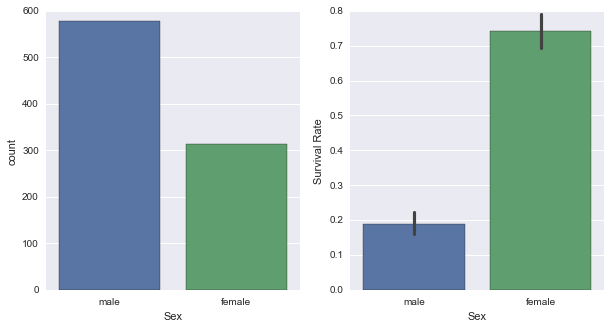

In [10]:
# Seeing the correlation between the Sex of the passengers and their chance of Survival

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = 'Sex', data = titanic_data, ax = axis1)
ss_bp = sns.barplot(x = 'Sex', y = 'Survived', data = titanic_data, ax = axis2, order = ['male', 'female'])
ss_bp.set(xlabel = 'Sex', ylabel = 'Survival Rate')

It seems from the above figures, that the chance of survival of females is much more as compared to that of males. Female passengers were given first priority in rescue operations.

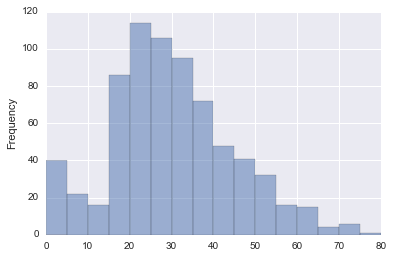

In [11]:
# Viewing the distribution of passengers while taking their Age into consideration. 

plt.figure()
titanic_data['Age'].plot.hist(bins = 16, range = (0, 80), alpha = 0.5)

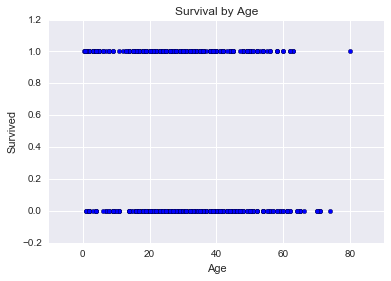

In [12]:
# Comparing their Age to their chances of Survival

plt.scatter(titanic_data['Age'], titanic_data['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Survival by Age')

It seems somewhat from the above scatterplot, that people of lesser ages were given the priority in rescue operations. Essentially children. Also the elderly were given priority. Adult males were the worst affected. 

[<matplotlib.text.Text at 0xc4ccda0>, <matplotlib.text.Text at 0xc4bf240>]

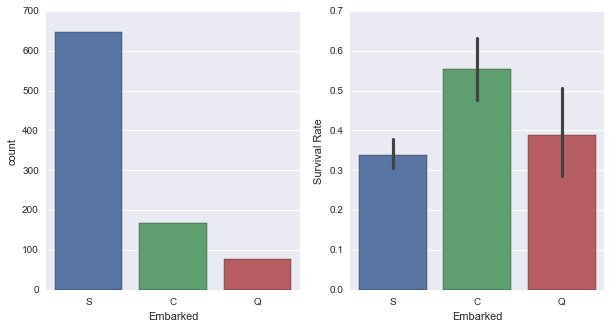

In [13]:
# Comparing the Survival rate with respect to their boarding points. 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = 'Embarked', data = titanic_data, ax = axis1)
se_bp = sns.barplot(x = 'Embarked', y = 'Survived', data = titanic_data, ax = axis2)
se_bp.set(xlabel = 'Embarked', ylabel = 'Survival Rate')

Not any clear correlation. We can say that the people who boarded at the 'C' station had quite a high chance of Survival.

[<matplotlib.text.Text at 0xc712710>, <matplotlib.text.Text at 0xc6fab70>]

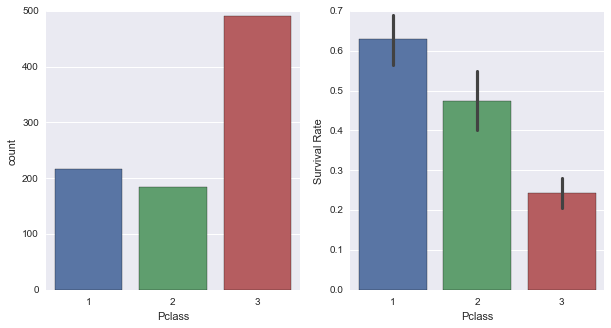

In [14]:
# Comparing the Survival rate in consideration with class of their cabin.

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = 'Pclass', data = titanic_data, ax = axis1)
sp_bp = sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_data, ax = axis2)
sp_bp.set(xlabel = 'Pclass', ylabel = 'Survival Rate')

The Pclass variable indicates the cabin type with P1 being the first class and subsequently being the most expensive. There is a definite correlation here. We can see that rich and influential people might have been prioritized in comparison with other lower class people. 
Survival rate among the higher class is definitely much higher than the other two lower classes.

[<matplotlib.text.Text at 0x1119f8d0>, <matplotlib.text.Text at 0x11144860>]

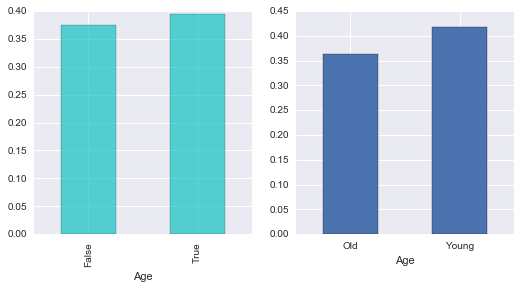

In [43]:
# Some plots for comparison of both age as well as sex

fig = plt.figure(figsize=(18,4), dpi=1600)

titanic_Age = titanic_data.groupby(titanic_data.Age >= titanic_data.Age.median()).mean()

ax1 = fig.add_subplot(141)
female_aged = titanic_data.groupby(titanic_data.Age >= titanic_data.Age.median()).mean()
female_aged['Survived'].plot(kind = 'bar', label = 'Female Aged', color = 'c', alpha = 0.65)


ax2 = fig.add_subplot(142)
titanicGB['Survived'].plot(kind = 'bar')
ax2.set_xticklabels(['Old', 'Young'], rotation = 0)

It seems that Old Females were given more priority than young ones.

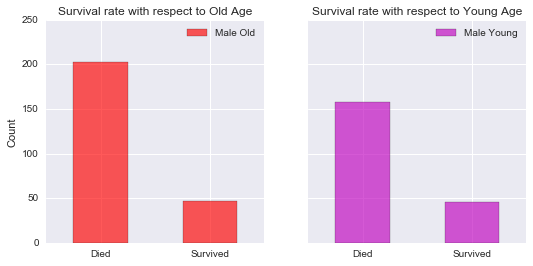

In [16]:
# Similar Comparison for males

fig = plt.figure(figsize=(18,4), dpi=1600)

ax3 = fig.add_subplot(141)
male_old = titanic_data.Survived[titanic_data.Sex == 'male'][titanic_data.Age >= titanic_data.Age.median()].value_counts()
male_old.plot(kind = 'bar', label = 'Male Old', color = 'r', alpha = 0.65)
ax3.set_xticklabels(['Died', 'Survived'], rotation = 0)
ax3.set_ylabel('Count')
plt.title('Survival rate with respect to Old Age')
plt.legend(loc = 'best')

ax4 = fig.add_subplot(142, sharey = ax3)
male_young = titanic_data.Survived[titanic_data.Sex == 'male'][titanic_data.Age < titanic_data.Age.median()].value_counts()
male_young.plot(kind = 'bar', label = 'Male Young', color = 'm', alpha = 0.65)
ax4.set_xticklabels(['Died', 'Survived'], rotation = 0)
plt.title('Survival rate with respect to Young Age')
plt.legend(loc = 'best')

It is clear from the above 4 graphs that both Age and Gender mattered when it came to decide which people would be rescued first. 
Because of the age distribution that we saw, the median age comes out to be in the bracket of 20-30 years for both genders. Keeping that in mind, the graph for males clearly shows that kids were also given a lot of priority.

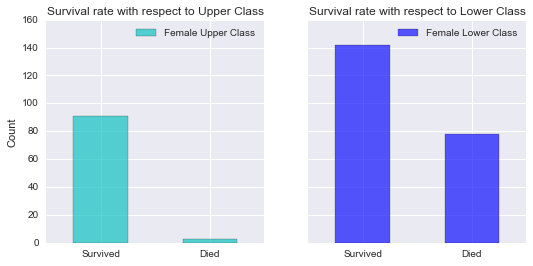

In [17]:
# Comparison of Class and Gender

fig = plt.figure(figsize=(18,4), dpi=1600)

ax1 = fig.add_subplot(141)
female_upper_class = titanic_data.Survived[titanic_data.Sex == 'female'][titanic_data.Pclass == 1].value_counts()
female_upper_class.plot(kind = 'bar', label = 'Female Upper Class', color = 'c', alpha = 0.65)
ax1.set_xticklabels(['Survived', 'Died'], rotation = 0)
ax1.set_ylabel('Count')
plt.title('Survival rate with respect to Upper Class')
plt.legend(loc = 'best')

ax2 = fig.add_subplot(142, sharey = ax1)
female_lower_class = titanic_data.Survived[titanic_data.Sex == 'female'][titanic_data.Pclass != 1].value_counts()
female_lower_class.plot(kind = 'bar', label = 'Female Lower Class', color = 'b', alpha = 0.65)
ax2.set_xticklabels(['Survived', 'Died'], rotation = 0)
plt.title('Survival rate with respect to Lower Class')
plt.legend(loc = 'best')

An extremely visible trend here with respect to class. Upper class females seemed to have gotten the highest priority in rescue operations

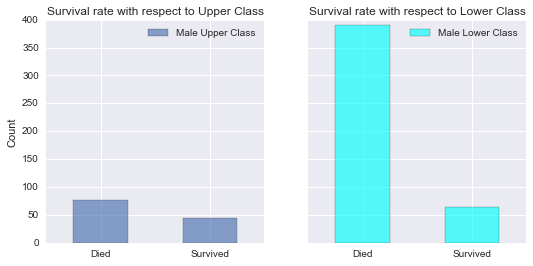

In [18]:
# The same comparison for males

fig = plt.figure(figsize=(18,4), dpi=1600)

ax1 = fig.add_subplot(141)
male_upper_class = titanic_data.Survived[titanic_data.Sex == 'male'][titanic_data.Pclass == 1].value_counts()
male_upper_class.plot(kind = 'bar', label = 'Male Upper Class', alpha = 0.65)
ax1.set_xticklabels(['Died', 'Survived'], rotation = 0)
ax1.set_ylabel('Count')
plt.title('Survival rate with respect to Upper Class')
plt.legend(loc = 'best')

ax2 = fig.add_subplot(142, sharey = ax1)
male_lower_class = titanic_data.Survived[titanic_data.Sex == 'male'][titanic_data.Pclass != 1].value_counts()
male_lower_class.plot(kind = 'bar', label = 'Male Lower Class', color = 'aqua', alpha = 0.65)
ax2.set_xticklabels(['Died', 'Survived'], rotation = 0)
plt.title('Survival rate with respect to Lower Class')
plt.legend(loc = 'best')

Again, a very visible trend in the selection of people to be rescued. Lower Class males were the worst affected with very little chances of survival.

--------------------------------------------------------------------------------------------------------------------------------

The above few visualizations tell us that certain categories of people were favoured than the other categories. For instance children and women were most likely to be favoured in rescue operations. Another startling fact is that people were also favoured depending upon their monetary status, i.e. upper class people, both males and females were far more likely to survive than the rest of the people. 

More information could have been provided for a more detailed analysis. For instance, if we knew which floors had which class rooms, we could correlate the likeliness of getting rescued, given the time it takes to come main deck of the ship from that particular floor. Also, it is still not clear howcome people who boarded from the 'C' station, have been far more likely to be rescued, given that they were also in quite small numbers compared to the overall population. 

It would be nice to have more data in terms of the above factors, to get more insights about this dataset. 

--------------------------------------------------------------------------------------------------------------------------------

A little help was taken from the following kaggle profile in getting ideas about the visualizations - 
https://www.kaggle.com/malais/titanic/kaggle-first-ipythonnotebook/run/96456

Also the documentation of the libraries used has been instrumental in understanding the functions and their usage.

In [45]:
titanicGB = titanic_data['Sex'].groupby(titanic_data.Age < titanic_data.Age.median()).mean()
print titanicGB

DataError: No numeric types to aggregate

In [50]:
print titanic_data['Age'].groupby(titanic_data['Sex']).mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
